In [1]:
import numpy as np
from scipy.stats import ks_2samp
from scipy import stats
import matplotlib.pyplot as plt
import h5py

import sys
sys.path.append('../py_files/')
#import weights
import control_sample as control

In [2]:
import os
tex_path = '/apps/texlive/2023/bin/x86_64-linux/'
os.environ['PATH'] += os.pathsep + tex_path

In [3]:
import scienceplots
plt.style.use('science')

In [4]:
pop_file_loc = "/home/pranavsatheesh/host_galaxies/data/population_files/"
pop_file = pop_file_loc + "population_sort_gas-100_dm-100_star-100_bh-001_w_rsep_cut.hdf5"
pop = h5py.File(pop_file, 'r')

In [5]:
pop['merging_population'].keys()

<KeysViewHDF5 ['MBH', 'MBH_1', 'MBH_2', 'Mdot', 'Mgas', 'Mstar', 'SFR', 'q_merger', 'snap', 'subhalo_ids', 'z']>

In [6]:
control_file_loc = "/home/pranavsatheesh/host_galaxies/data/control_files/"
control_idx_file = "control_sample_ids.txt"
controlpop = control.control_samples(pop,control_file_loc,control_idx_file)

The average sSFR for merging galaxies is 1.160e-09
The average sSFR for non-merging galaxies is 7.254e-10
The sSFR enhancement in post mergers is 1.599
The average Mgas for merging galaxies is 1.594e+11
The average Mgas for non-merging galaxies is 1.238e+11
The Mgas enhancement in post mergers is 1.288
The average fgas for merging galaxies is 7.609e-01
The average fgas for non-merging galaxies is 6.606e-01
The fgas enhancement in post mergers is 1.152
The average Mdot for merging galaxies is 6.013e-02
The average Mdot for non-merging galaxies is 3.538e-02
The Mdot enhancement in post mergers is 1.700


In [7]:
print(np.sum(controlpop.MBH_merging_pop==0),"PMs without BHs")
print("sSFR:",controlpop.sSFR_merging_pop[controlpop.MBH_merging_pop==0])
print("Mstar:",controlpop.Mstar_merging_pop[controlpop.MBH_merging_pop==0])
print("SFR:",controlpop.fgas_merging_pop[controlpop.MBH_merging_pop==0])

7 PMs without BHs
sSFR: [0.00000000e+00 1.18052093e-09 1.55772521e-10 6.59408207e-10
 6.64238497e-11 8.42380705e-10 4.72514701e-11]
Mstar: [3.55108266e+08 1.27228772e+10 7.16681110e+10 2.72009941e+09
 2.41327412e+11 2.54364238e+10 1.07958629e+11]
SFR: [5.51013018e-04 8.74108981e-01 6.41952183e-01 9.18842587e-01
 6.05383153e-01 5.37829043e-02 6.60733107e-01]


### Check the control vs mergers match 

/home/pranavsatheesh/host_galaxies/notebooks/../py_files/control_sample.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Figure saved in ../figures/control-pm-z-Mstar-match.pdf


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: xlabel='z', ylabel='Density'>,
        <Axes: xlabel='$\\log(M_{\\star}/M_{\\odot})$'>], dtype=object))

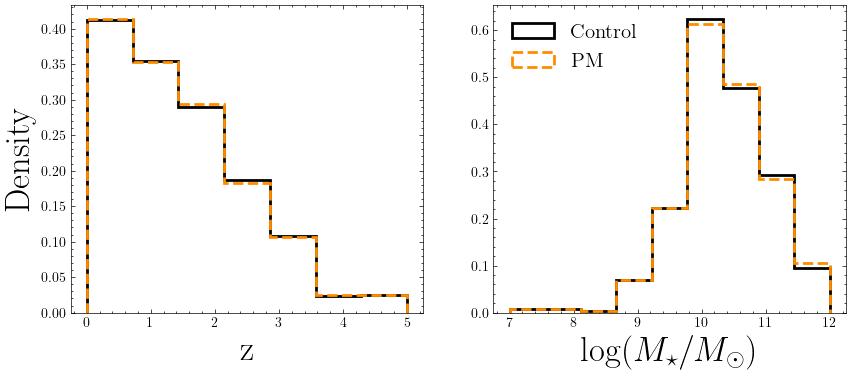

In [8]:
figure_loc = '../figures/'
controlpop.match_z_Mstar_plot(figure_loc)

### Properties of Mergers vs Control

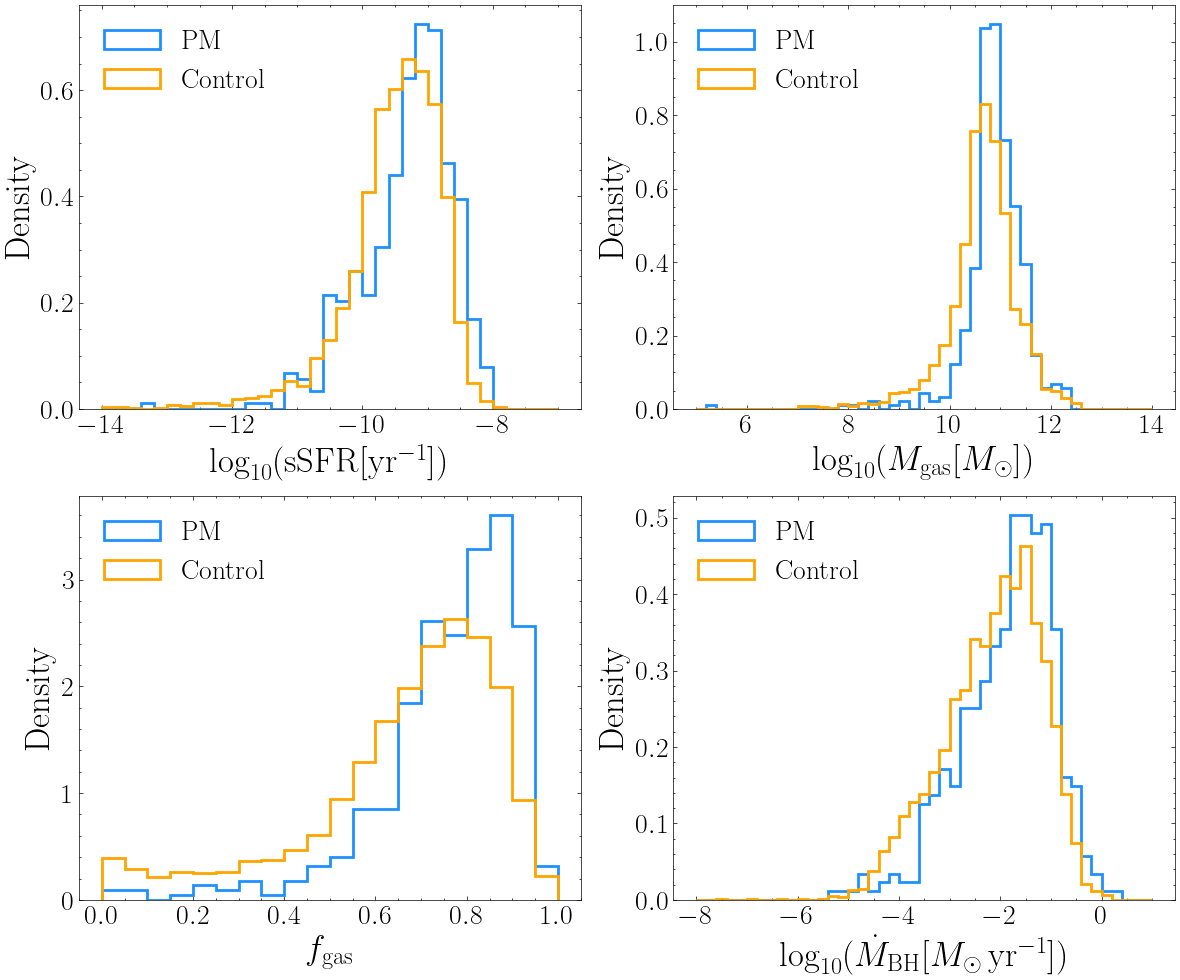

In [9]:
bin_settings = {
            'sSFR': {'binsize': 0.2, 'bin_min': -14, 'bin_max': -7},
            'Mgas': {'binsize': 0.2, 'bin_min': 5, 'bin_max': 14},
            'fgas': {'binsize': 0.05, 'bin_min': 0, 'bin_max': 1},
            'Mdot': {'binsize': 0.2, 'bin_min': -8, 'bin_max': 1},
            }

figure_loc = '../figures/mergers_vs_control_properties_hist.pdf'
axes,fig = controlpop.plot_PM_and_control_histograms(bin_settings)
fig.savefig(figure_loc)

### sSFR vs redshift

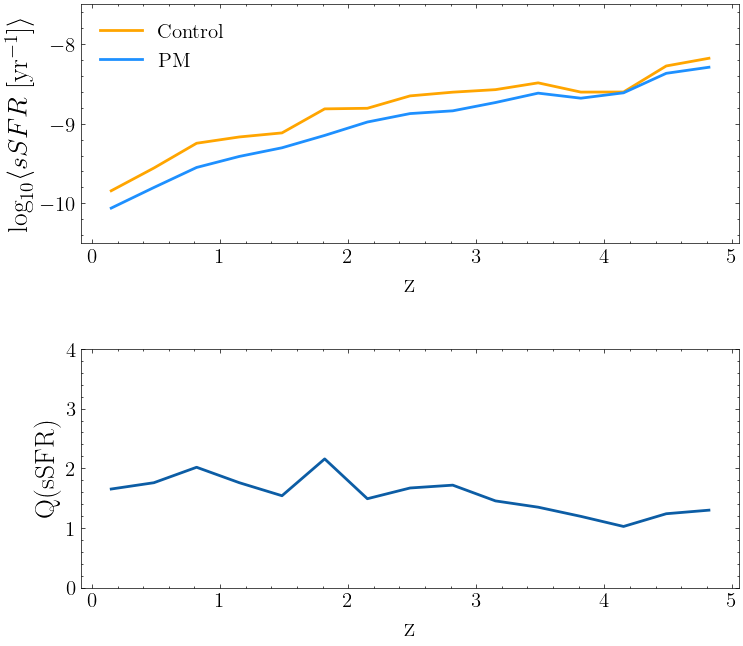

In [10]:
controlpop.set_plot_style(linewidth=2,labelsize=20,ticksize=15,legendsize=15)
fig,axes = controlpop.plot_sSFR_evolution()
fig.set_size_inches(8,7)
axes[0].set_ylim(-10.5,-7.5)
axes[0].set_ylabel(r'$\log_{10}\langle sSFR \; [\mathrm{yr}^{-1}]\rangle$')
figure_loc = '../figures/sSFR_z_evolution_merger_vs_control.pdf'
fig.savefig(figure_loc)

### Mdot vs redshift

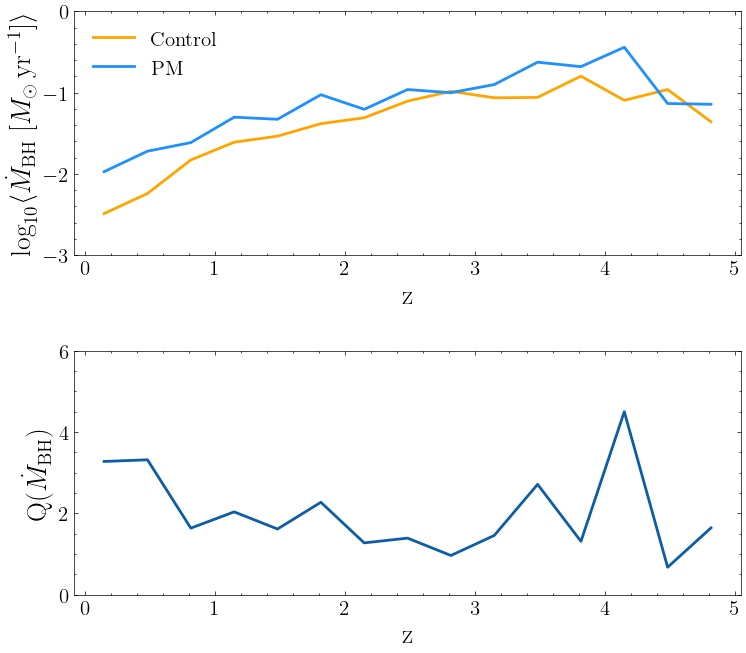

In [11]:
controlpop.set_plot_style(linewidth=2,labelsize=20,ticksize=15,legendsize=15)
fig,axes = controlpop.plot_mdot_evolution(z_min=0, z_max=5, z_binsize=0.3)
fig.set_size_inches(8,7)
axes[0].set_ylim(-3,0)
axes[1].set_ylim(0,6)
axes[0].set_ylabel(r'$\log_{10}\langle \dot{M}_{\mathrm{BH}} \; [M_{\odot} \, \mathrm{yr}^{-1}]\rangle$')
figure_loc = '../figures/mdot_z_evolution_merger_vs_control.pdf'
fig.savefig(figure_loc)